# Project 1: Regression - Kings County

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df = pd.read_csv("data/df_clean.csv")
df.head()

,Unnamed: 0,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_l_price
0,0,141013,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,1180,0.0,1955,141013,98178,47.5112,-122.257,1340,5650,188.05
1,1,141209,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,2170,400.0,1951,141209,98125,47.7210,-122.319,1690,7639,209.34
2,2,150225,180000.0,2.0,1.00,770,10000,1.0,0,0,...,770,0.0,1933,150225,98028,47.7379,-122.233,2720,8062,233.77
3,3,141209,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,1050,910.0,1965,141209,98136,47.5208,-122.393,1360,5000,308.16
4,4,150218,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,1680,0.0,1987,150218,98074,47.6168,-122.045,1800,7503,303.57


In [3]:
# drop "id" column
df.drop("Unnamed: 0", inplace=True, axis=1)

In [4]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_l_price
0,141013,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,...,1180,0.0,1955,141013,98178,47.5112,-122.257,1340,5650,188.05
1,141209,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,...,2170,400.0,1951,141209,98125,47.7210,-122.319,1690,7639,209.34
2,150225,180000.0,2.0,1.00,770,10000,1.0,0,0,3,...,770,0.0,1933,150225,98028,47.7379,-122.233,2720,8062,233.77
3,141209,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,...,1050,910.0,1965,141209,98136,47.5208,-122.393,1360,5000,308.16
4,150218,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,...,1680,0.0,1987,150218,98074,47.6168,-122.045,1800,7503,303.57


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
date             21597 non-null int64
price            21597 non-null float64
bedrooms         21595 non-null float64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
sqft_l_price     21597 non-null float64
dtypes: float64(8), int64(13)
memory usage: 3.5 MB


<AxesSubplot:>

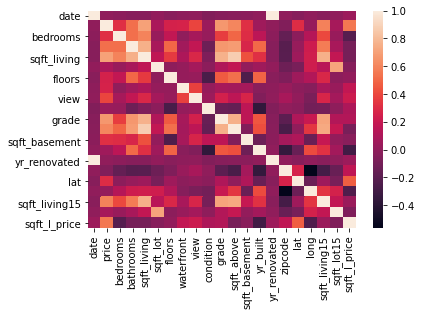

In [6]:
sns.heatmap(df.corr())

In [7]:
# label
y = df["price"]

## Building Model 1: hard facts

In [8]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sqft_l_price'],
      dtype='object')

In [9]:
# feature 1 "hard factors"
X = df[['bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'sqft_above',
       'sqft_basement', 'yr_built']]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=13)

In [11]:
lm = LinearRegression()

In [12]:
lm.fit(X_train,y_train)

LinearRegression()

In [13]:
lm.intercept_

5762117.224409163

In [14]:
lm.coef_

array([ 4.33589704e+04,  1.60082503e+02, -2.08427699e-01,  5.38317904e+04,
        8.17843903e+05,  1.08489373e+02,  9.81506729e+01, -3.02019721e+03])

In [15]:
X.columns

Index(['bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
       'sqft_above', 'sqft_basement', 'yr_built'],
      dtype='object')

In [16]:
coef_df_1 = pd.DataFrame(lm.coef_, X.columns, columns=["coefficients"])
coef_df_1

,coefficients
bathrooms,43358.970369
sqft_living,160.082503
sqft_lot,-0.208428
floors,53831.790387
waterfront,817843.902732
sqft_above,108.489373
sqft_basement,98.150673
yr_built,-3020.197210


In [17]:
print("RSQ")
lm.score(X_test,y_test)

RSQ


0.5818571117672633

### Test

In [18]:
predictions = lm.predict(X_test)
predictions

array([229612.27774309, 405101.90483149, 338380.17769806, ...,
       616890.72091251, 676258.92606374, 380272.94577881])

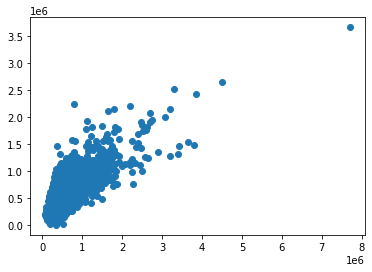

In [19]:
plt.scatter(y_test,predictions);

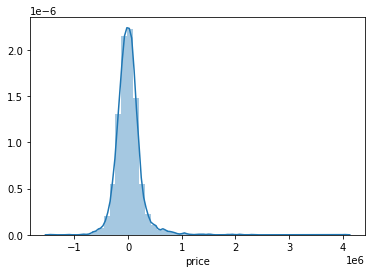

In [20]:
# inaccuracies
sns.distplot((y_test-predictions));

since it looks like normally distributed the model is applicable

### Metrics

In [21]:
round(np.sqrt(metrics.mean_squared_error(y_test, predictions)), 2)

240171.29

## Model 2: location and neighbors

In [22]:
# feature 2 "location and neighbors"
X = df[['zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=13)

In [24]:
lm = LinearRegression()

In [25]:
lm.fit(X_train,y_train)

LinearRegression()

In [26]:
lm.intercept_

-56634888.129218146

In [27]:
lm.coef_

array([-3.83300128e+02,  7.19905625e+05, -4.89920484e+05,  3.26225107e+02,
        4.97819601e-01])

In [28]:
X.columns

Index(['zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], dtype='object')

In [29]:
coef_df_2 = pd.DataFrame(lm.coef_, X.columns, columns=["coefficients"])
coef_df_2

,coefficients
zipcode,-383.300128
lat,719905.624977
long,-489920.483775
sqft_living15,326.225107
sqft_lot15,0.497820


In [30]:
lm.score(X_test,y_test)

0.45461497794725914

### Test

In [31]:
predictions = lm.predict(X_test)
predictions

array([453999.41195817, 217104.26291131, 532308.75937801, ...,
       690729.593724  , 897662.0834404 , 323630.72552551])

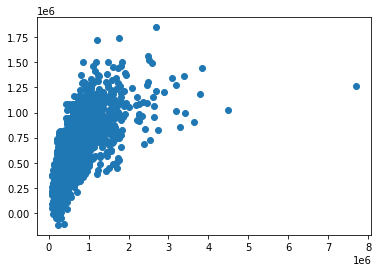

In [32]:
plt.scatter(y_test,predictions);

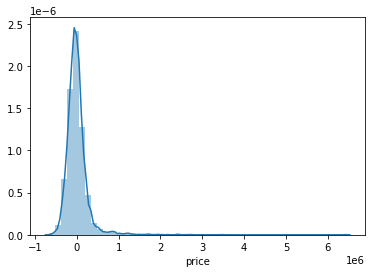

In [33]:
# inaccuracies
sns.distplot((y_test-predictions));

### Metrics

In [34]:
round(np.sqrt(metrics.mean_squared_error(y_test, predictions)), 2)

274290.23

## Model 3: everything


In [35]:
# feature 3 "everything"
X_3 = df[['bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sqft_l_price']]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=13)

In [37]:
lm = LinearRegression()

In [38]:
lm.fit(X_train,y_train)

LinearRegression()

In [39]:
lm.intercept_

-56634888.129218146

In [40]:
lm.coef_

array([-3.83300128e+02,  7.19905625e+05, -4.89920484e+05,  3.26225107e+02,
        4.97819601e-01])

In [41]:
coef_df_2 = pd.DataFrame(lm.coef_, X.columns, columns=["coefficients"])
coef_df_2

,coefficients
zipcode,-383.300128
lat,719905.624977
long,-489920.483775
sqft_living15,326.225107
sqft_lot15,0.497820


In [42]:
lm.score(X_test,y_test)

0.45461497794725914

### Test

In [43]:
predictions = lm.predict(X_test)
predictions

array([453999.41195817, 217104.26291131, 532308.75937801, ...,
       690729.593724  , 897662.0834404 , 323630.72552551])

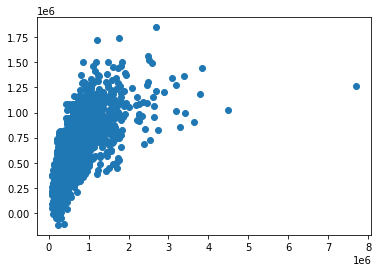

In [44]:
plt.scatter(y_test,predictions);

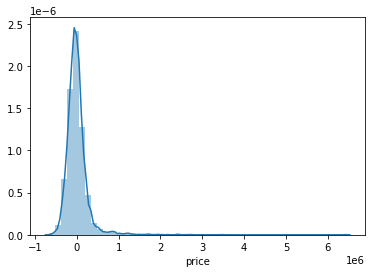

In [45]:
# inaccuracies
sns.distplot((y_test-predictions));

### Metrics

In [46]:
round(np.sqrt(metrics.mean_squared_error(y_test, predictions)), 2)

274290.23